In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
import sklearn.metrics
from sklearn.tree import DecisionTreeClassifier

In [3]:
# Reading data
df = pd.read_csv("student_performance.csv")

In [4]:
# Printing few records
df.head(10)

,Sl.No.,USN,STUDENT NAME,Test I,Test II,Test III,Test Total,Test Result,Quiz 1,Quiz 2,Compensatory,Quiz,Quiz Result,Test + Quiz,Assignment,Unnamed: 15,Assignment Result,Result
0,1,1RV21MC001,ABHISHEK M,34,39,14,29.000000,1,4.0,6.0,10.0,16.0,1,45.000000,14,13,1,1
1,2,1RV21MC006,AJITH KUMAR K,30,33,27,30.000000,1,6.5,6.0,9.0,15.5,1,45.500000,14,13,1,1
2,3,1RV21MC009,AKASH E PUNAGIN,28,36,22,28.666667,1,7.0,5.0,NaN,12.0,1,40.666667,14,13,1,1
3,4,1RV21MC011,AMIT KUMAR,16,28,32,25.333333,1,3.0,2.0,10.0,13.0,1,38.333333,13,13,1,1
4,5,1RV21MC012,ANANDGOUDA PATIL,25,42,27,31.333333,1,6.0,5.0,10.0,16.0,1,47.333333,13,14,1,1
5,6,1RV21MC022,BHAKTHI PRABHU,27,33,22,27.333333,1,6.5,4.0,10.0,16.5,1,43.833333,14,14,1,0
6,7,1RV21MC025,BHAT DIVYA SUBRAHMANYA,32,45,28,35.000000,1,7.5,8.0,7.0,15.0,1,50.000000,15,15,1,0
7,8,1RV21MC027,CHANDAN B REDDY,12,22,17,17.000000,0,6.0,5.0,10.0,16.0,1,33.000000,13,14,1,1
8,9,1RV21MC029,CHANDANA M,20,33,20,24.333333,0,5.0,4.0,8.0,13.0,1,37.333333,14,14,1,1
9,10,1RV21MC031,D S HARSHITHA,22,30,18,23.333333,0,3.5,5.0,10.0,15.0,1,38.333333,14,14,1,1


In [5]:
# Prininting dimensions of the data
df.shape

(54, 18)

In [6]:
# Printing the information on dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sl.No.              54 non-null     int64  
 1   USN                 54 non-null     object 
 2   STUDENT NAME        54 non-null     object 
 3   Test I              54 non-null     int64  
 4   Test II             54 non-null     int64  
 5   Test III            54 non-null     int64  
 6   Test Total          54 non-null     float64
 7   Test Result         54 non-null     int64  
 8   Quiz 1              54 non-null     float64
 9   Quiz 2              54 non-null     float64
 10  Compensatory        53 non-null     float64
 11  Quiz                54 non-null     float64
 12  Quiz Result         54 non-null     int64  
 13  Test + Quiz         54 non-null     float64
 14  Assignment          54 non-null     int64  
 15  Unnamed: 15         54 non-null     int64  
 16  Assignment

In [7]:
# Prining dataset information
df.describe()

,Sl.No.,Test I,Test II,Test III,Test Total,Test Result,Quiz 1,Quiz 2,Compensatory,Quiz,Quiz Result,Test + Quiz,Assignment,Unnamed: 15,Assignment Result,Result
count,54.000000,54.000000,54.000000,54.00000,54.000000,54.000000,54.000000,54.000000,53.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.0,54.000000
mean,27.907407,23.740741,30.462963,18.87037,24.358025,0.462963,5.592593,5.148148,9.490566,15.481481,0.981481,39.839506,13.759259,13.666667,1.0,0.500000
std,16.156392,8.355735,9.158382,7.47334,6.489744,0.503308,1.363521,1.516045,1.011903,1.710023,0.136083,6.903495,0.698656,0.700404,0.0,0.504695
min,1.000000,6.000000,6.000000,5.00000,12.666667,0.000000,2.500000,2.000000,7.000000,10.500000,0.000000,27.000000,13.000000,12.000000,1.0,0.000000
25%,14.250000,17.000000,25.500000,14.25000,18.916667,0.000000,5.000000,4.000000,10.000000,15.000000,1.000000,35.041667,13.000000,13.000000,1.0,0.000000
50%,27.500000,25.000000,32.000000,18.00000,24.000000,0.000000,5.500000,5.000000,10.000000,15.500000,1.000000,38.500000,14.000000,14.000000,1.0,0.500000
75%,41.750000,29.750000,37.750000,22.00000,28.500000,1.000000,6.875000,6.000000,10.000000,16.500000,1.000000,45.375000,14.000000,14.000000,1.0,1.000000
max,55.000000,46.000000,45.000000,43.00000,41.000000,1.000000,8.000000,10.000000,10.000000,20.000000,1.000000,60.000000,15.000000,15.000000,1.0,1.000000


In [8]:
# Listing all columns
lst = list(df.columns)
lst

['Sl.No.',
 'USN',
 'STUDENT NAME',
 'Test I ',
 'Test II ',
 'Test III',
 'Test Total ',
 'Test Result ',
 'Quiz 1',
 'Quiz 2',
 'Compensatory',
 'Quiz',
 'Quiz Result ',
 'Test + Quiz',
 'Assignment ',
 'Unnamed: 15',
 'Assignment Result ',
 'Result']

In [9]:
# Replacing null values with mean
for col in lst:
    if df[col].dtype != 'O':
        df[col] = df[col].fillna(df[col].mean())

In [10]:
# Checking if the null values are removed
df.isnull().sum()

Sl.No.                0
USN                   0
STUDENT NAME          0
Test I                0
Test II               0
Test III              0
Test Total            0
Test Result           0
Quiz 1                0
Quiz 2                0
Compensatory          0
Quiz                  0
Quiz Result           0
Test + Quiz           0
Assignment            0
Unnamed: 15           0
Assignment Result     0
Result                0
dtype: int64

In [11]:
# Features
features = lst[3:len(lst) - 1]
X = df[features]
X.head(10)

,Test I,Test II,Test III,Test Total,Test Result,Quiz 1,Quiz 2,Compensatory,Quiz,Quiz Result,Test + Quiz,Assignment,Unnamed: 15,Assignment Result
0,34,39,14,29.000000,1,4.0,6.0,10.000000,16.0,1,45.000000,14,13,1
1,30,33,27,30.000000,1,6.5,6.0,9.000000,15.5,1,45.500000,14,13,1
2,28,36,22,28.666667,1,7.0,5.0,9.490566,12.0,1,40.666667,14,13,1
3,16,28,32,25.333333,1,3.0,2.0,10.000000,13.0,1,38.333333,13,13,1
4,25,42,27,31.333333,1,6.0,5.0,10.000000,16.0,1,47.333333,13,14,1
5,27,33,22,27.333333,1,6.5,4.0,10.000000,16.5,1,43.833333,14,14,1
6,32,45,28,35.000000,1,7.5,8.0,7.000000,15.0,1,50.000000,15,15,1
7,12,22,17,17.000000,0,6.0,5.0,10.000000,16.0,1,33.000000,13,14,1
8,20,33,20,24.333333,0,5.0,4.0,8.000000,13.0,1,37.333333,14,14,1
9,22,30,18,23.333333,0,3.5,5.0,10.000000,15.0,1,38.333333,14,14,1


In [97]:
# Target Variable
y = df["Result"]
y.head(10)

0    1
1    1
2    1
3    1
4    1
5    0
6    0
7    1
8    1
9    1
Name: Result, dtype: int64

In [98]:
# Splitting the dataset into Train set and Test set
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=1)

In [99]:
# Training the model
dtc = DecisionTreeClassifier(criterion="gini", max_depth = 3)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

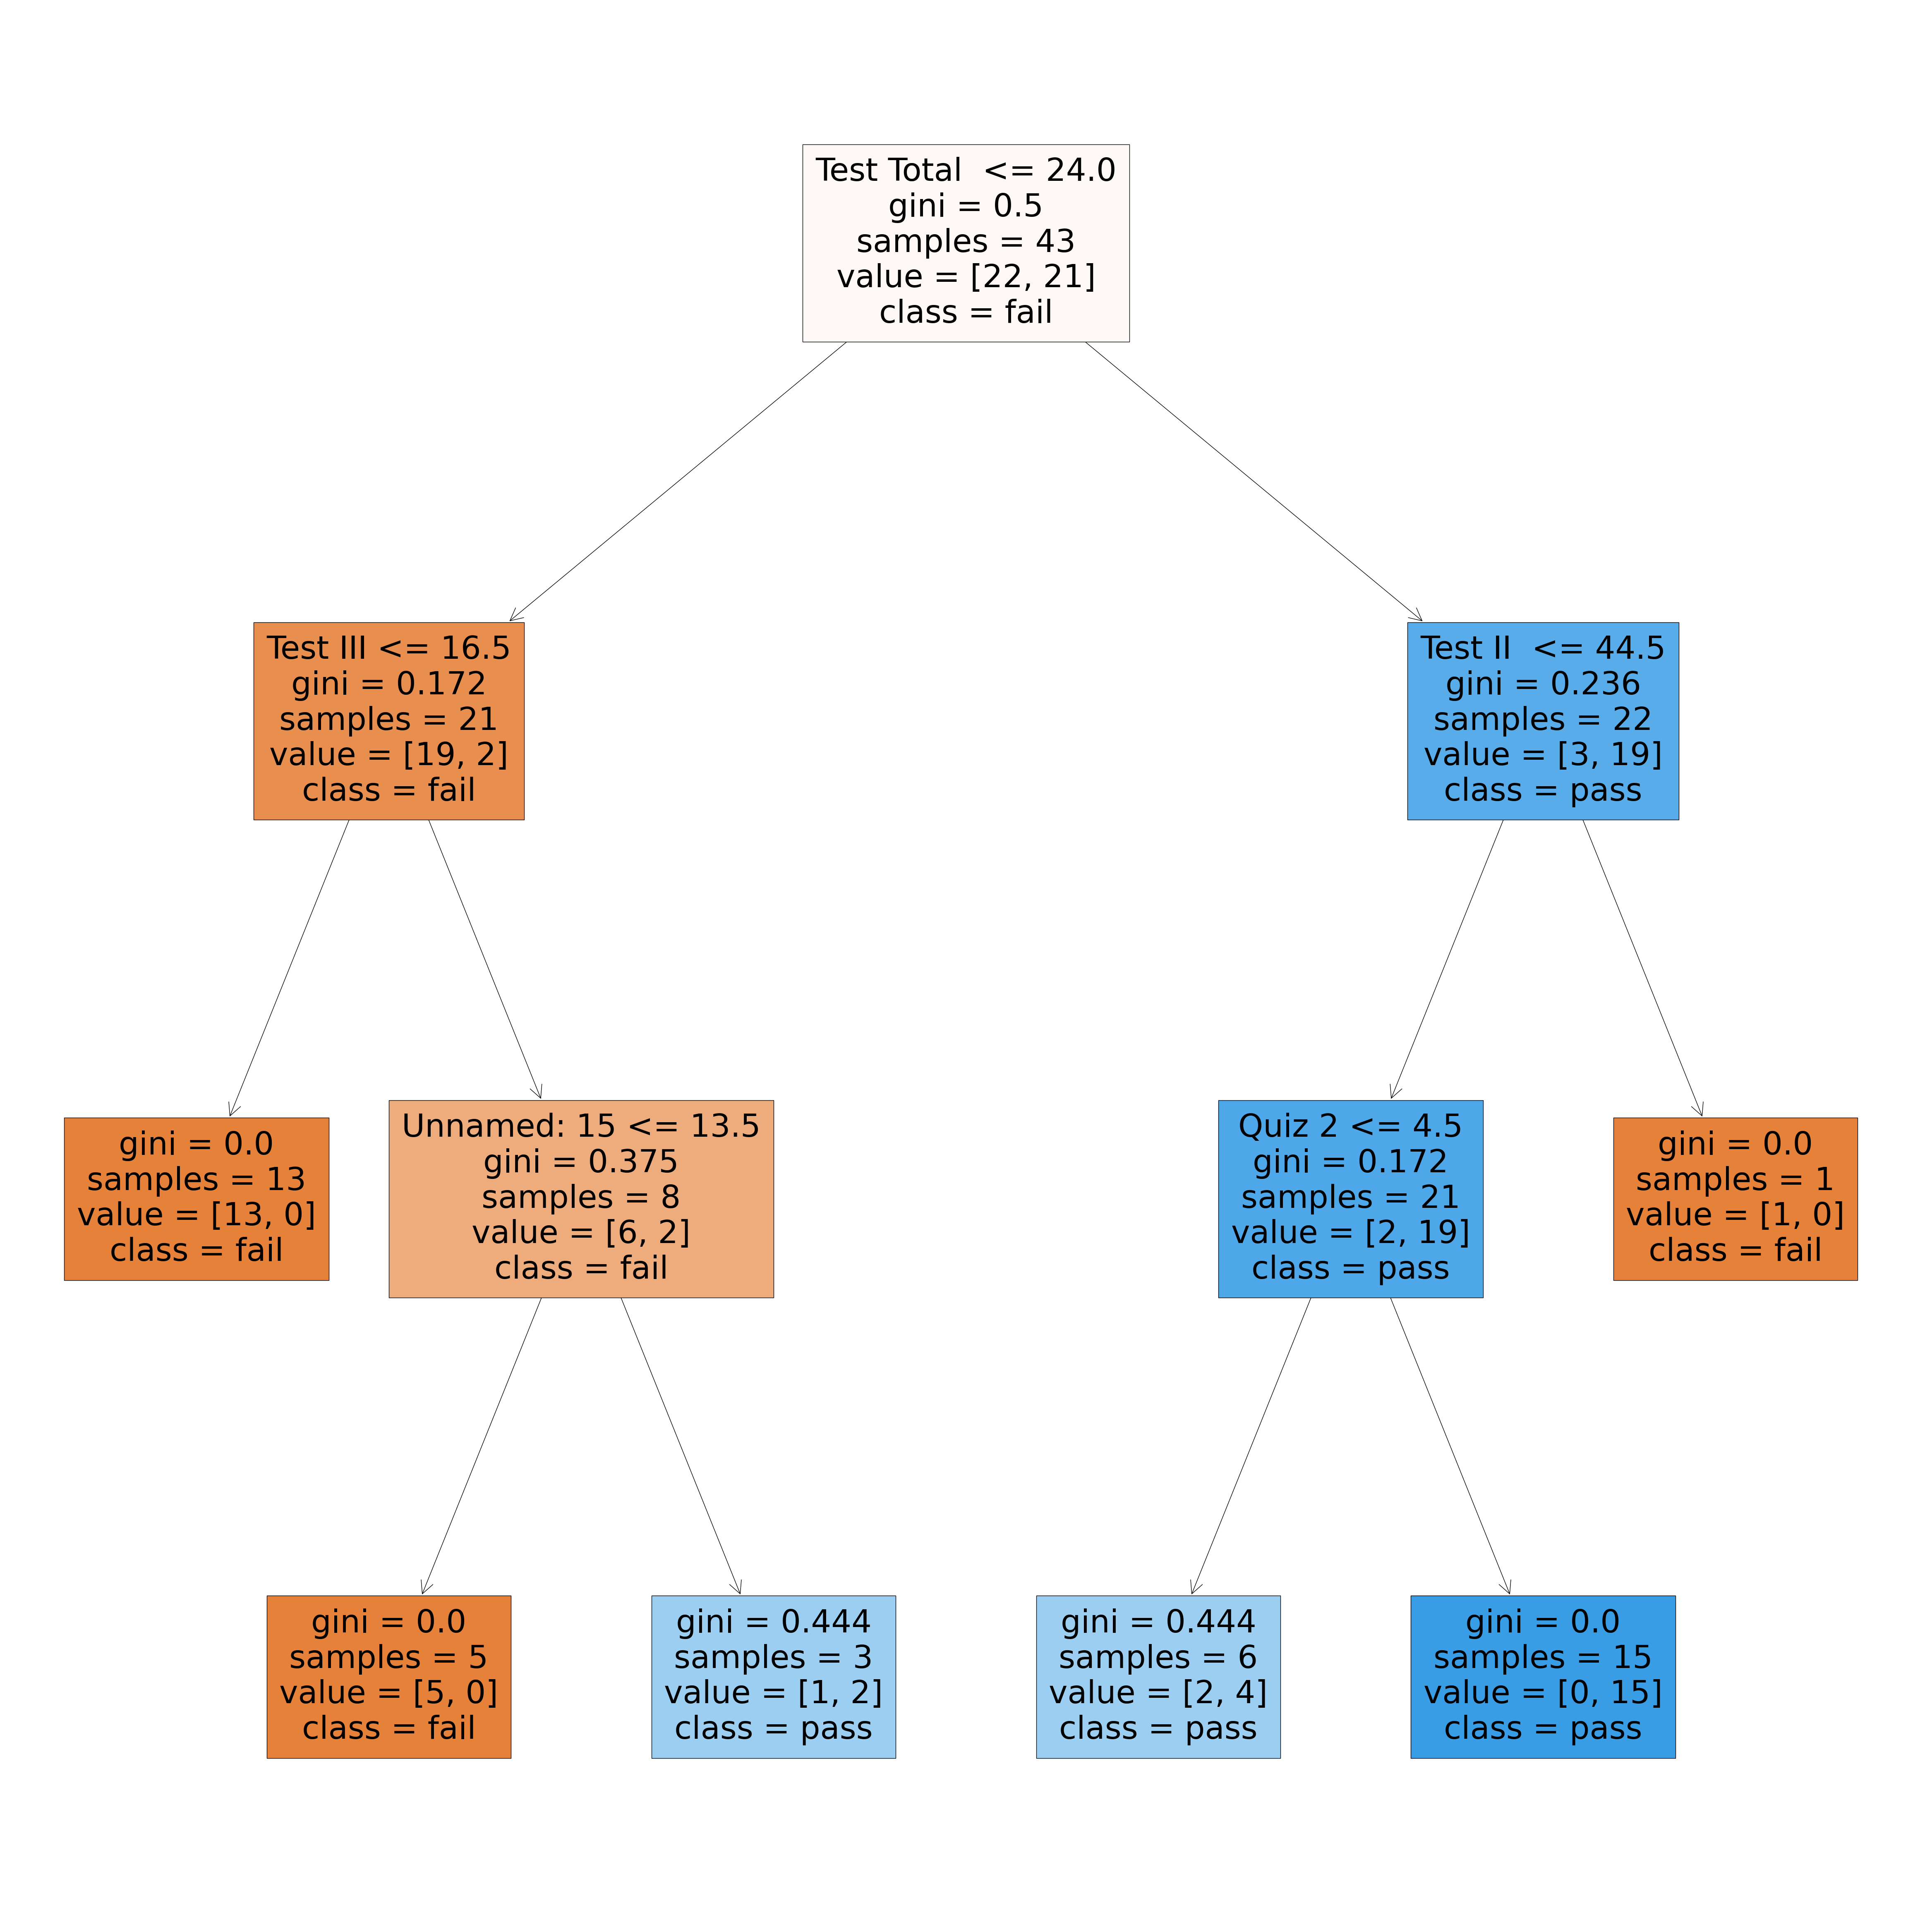

In [100]:
# Plotting the tree
from sklearn import tree
plt.figure(figsize=(60,60))
classnames = ["fail", "pass"]
tree1 = tree.plot_tree(dtc, feature_names=X_train.columns, class_names=classnames, filled = True)

<Axes: >

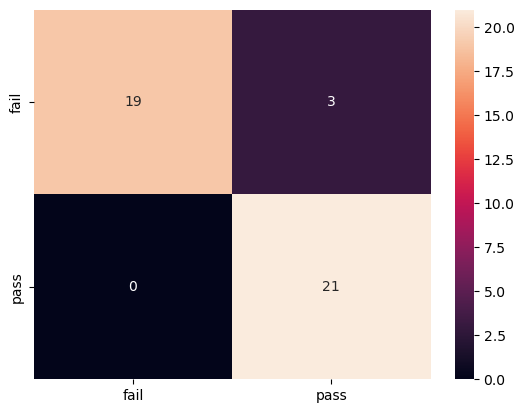

In [101]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
# Confusion Matrix for Train data
y_train_pred = dtc.predict(X_train)
cm1 = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm1, annot = True, yticklabels = classnames, xticklabels = classnames)

<Axes: >

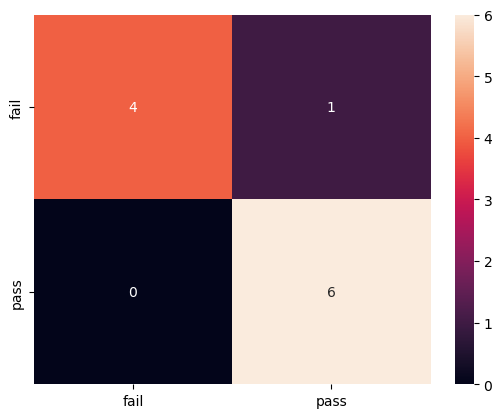

In [102]:
# Confusion Matrix for Test Data
y_test_pred = dtc.predict(X_test)
cm2 = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm2, annot = True, yticklabels = classnames, xticklabels = classnames)

In [103]:
#Printing the Evaluation Metric Results for both train and test data
print(f'Accuracy of Train set: {accuracy_score(y_train, y_train_pred)}, Test: {accuracy_score(y_test, y_test_pred)}')
print(f'Precision score of Train set: {precision_score(y_train, y_train_pred)}, Test: {precision_score(y_test, y_test_pred)}')
print(f'Recall score of Train set: {recall_score(y_train, y_train_pred)}, Test: {recall_score(y_test, y_test_pred)}')
print(f'F1 score of Train set: {f1_score(y_train, y_train_pred)}, Test: {f1_score(y_test, y_test_pred)}')

Accuracy of Train set: 0.9302325581395349, Test: 0.9090909090909091
Precision score of Train set: 0.875, Test: 0.8571428571428571
Recall score of Train set: 1.0, Test: 1.0
F1 score of Train set: 0.9333333333333333, Test: 0.923076923076923


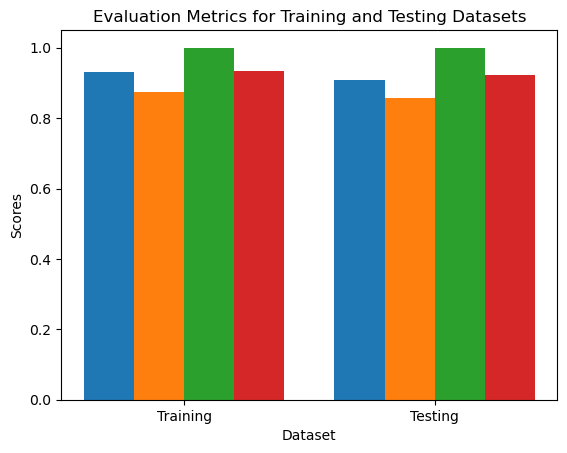

In [104]:
# Plotting Train and Test scores
x = np.arange(2)
plt.bar(x-0.30, [accuracy_score(y_train,y_train_pred), accuracy_score(y_test,y_test_pred)], width=0.20)
plt.bar(x-0.10, [precision_score(y_train,y_train_pred), precision_score(y_test,y_test_pred)], width=0.20)
plt.bar(x+0.10, [recall_score(y_train,y_train_pred), recall_score(y_test,y_test_pred)], width=0.20)
plt.bar(x+0.30, [f1_score(y_train,y_train_pred), f1_score(y_test,y_test_pred)], 0.20)
plt.xticks(ticks=[0,1], labels=['Training', 'Testing'])
plt.xlabel("Dataset")
plt.ylabel("Scores")
plt.title("Evaluation Metrics for Training and Testing Datasets")
plt.show()

In [108]:
# Data for prediction
dict_trial = {'Test I ':25, 'Test II ': 42, 'Test III': 27, 'Test Total ': 31.333333, 'Test Result ': 1, 'Quiz 1':6.0, 'Quiz 2':5.0, 'Compensatory': 10.000000, 'Quiz': 1, 'Quiz Result ':16.0, 'Test + Quiz': 47.333333, 'Assignment ': 13, 'Unnamed: 15': 14, 'Assignment Result ':1}
df_trial = pd.DataFrame(dict_trial, index=[0])
df_trial

,Test I,Test II,Test III,Test Total,Test Result,Quiz 1,Quiz 2,Compensatory,Quiz,Quiz Result,Test + Quiz,Assignment,Unnamed: 15,Assignment Result
0,25,42,27,31.333333,1,6.0,5.0,10.0,1,16.0,47.333333,13,14,1


In [109]:
# Prediction results
y_trial_pred = dtc.predict(df_trial)
if y_trial_pred == 1:
    print("Student has passed")
else:
    print("Student has failed")

Student has passed
